In [1]:
import sys 
print("Versão do python utilizado",sys.version)

Versão do python utilizado 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib

In [3]:
sns.set(style="whitegrid")

In [4]:
data = pd.read_csv("C:\Python\Dataset\pima-data.csv")

In [6]:
print(data.head(11))

     6  148  72  35    0  33.6  0.627  50  1
0    1   85  66  29    0  26.6  0.351  31  0
1    8  183  64   0    0  23.3  0.672  32  1
2    1   89  66  23   94  28.1  0.167  21  0
3    0  137  40  35  168  43.1  2.288  33  1
4    5  116  74   0    0  25.6  0.201  30  0
5    3   78  50  32   88  31.0  0.248  26  1
6   10  115   0   0    0  35.3  0.134  29  0
7    2  197  70  45  543  30.5  0.158  53  1
8    8  125  96   0    0   0.0  0.232  54  1
9    4  110  92   0    0  37.6  0.191  30  0
10  10  168  74   0    0  38.0  0.537  34  1


In [7]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
                6         148          72          35           0        33.6  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean     3.842243  120.859192   69.101695   20.517601   79.903520   31.990482   
std      3.370877   31.978468   19.368155   15.954059  115.283105    7.889091   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.00000

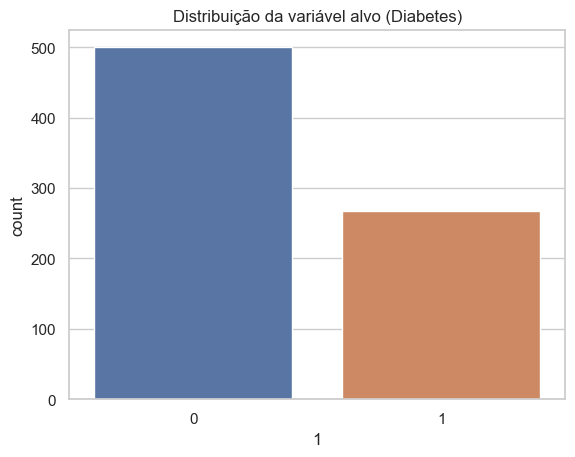

In [8]:
sns.countplot(x='1', data=data)
plt.title("Distribuição da variável alvo (Diabetes)")
plt.show()

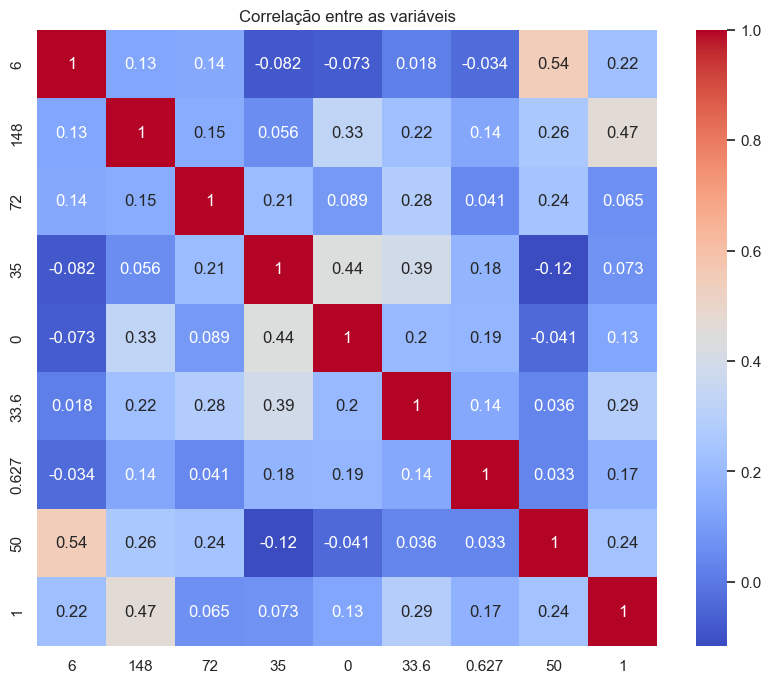

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre as variáveis")
plt.show()

In [10]:
X = data.drop(columns='1')  
y = data['1'] 

In [11]:
print((X == 0).sum())

6        111
148        5
72        35
35       227
0        373
33.6      11
0.627      0
50         0
dtype: int64


In [13]:
cols_to_replace = ['148', '72', '35', '0', '33.6']
X[cols_to_replace] = X[cols_to_replace].replace(0, np.nan)

In [14]:
X.fillna(X.mean(), inplace=True)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.22%


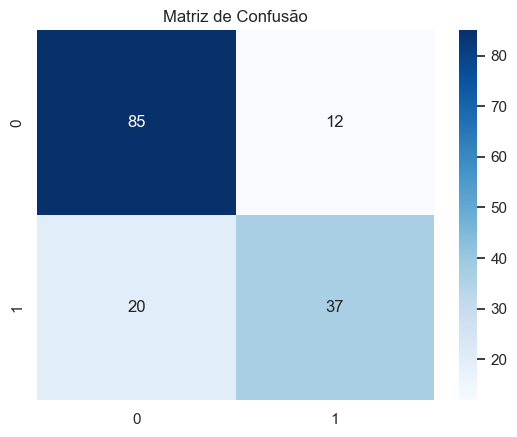

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        97
           1       0.76      0.65      0.70        57

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [22]:
y_pred_prob = model.predict_proba(X_test)[:,1]

In [23]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.87


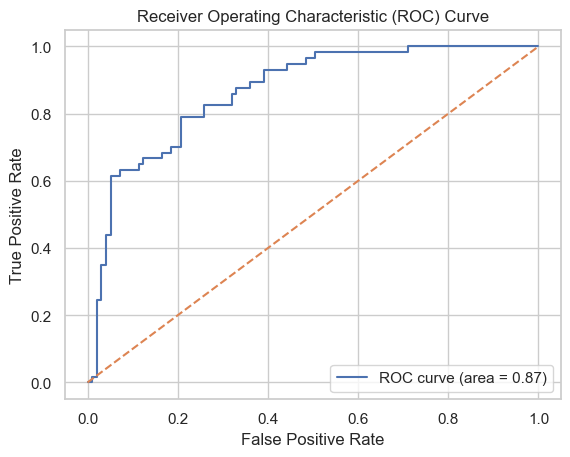

In [24]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [26]:
model_smote = LogisticRegression()
model_smote.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [27]:
y_pred_sm = model_smote.predict(X_test)
accuracy_sm = accuracy_score(y_test, y_pred_sm)
print(f"Accuracy com SMOTE: {accuracy_sm * 100:.2f}%")
print(classification_report(y_test, y_pred_sm))

Accuracy com SMOTE: 78.57%
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        97
           1       0.68      0.79      0.73        57

    accuracy                           0.79       154
   macro avg       0.77      0.79      0.78       154
weighted avg       0.80      0.79      0.79       154



In [29]:
joblib.dump(model, 'modelo_diabetes.pkl')
print("Modelo salvo como 'modelo_diabetes.pkl'")

Modelo salvo como 'modelo_diabetes.pkl'
